In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
raw_data = pd.read_csv('Life_Expectancy.csv')

In [49]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          99 non-null     object 
 1   Year                             99 non-null     int64  
 2   Status                           99 non-null     object 
 3   Life expectancy                  99 non-null     float64
 4   Adult Mortality                  99 non-null     int64  
 5   infant deaths                    99 non-null     int64  
 6   Alcohol                          99 non-null     float64
 7   percentage expenditure           99 non-null     float64
 8   Hepatitis B                      99 non-null     int64  
 9   Measles                          99 non-null     int64  
 10   BMI                             99 non-null     float64
 11  under-five deaths                99 non-null     int64  
 12  Polio                   

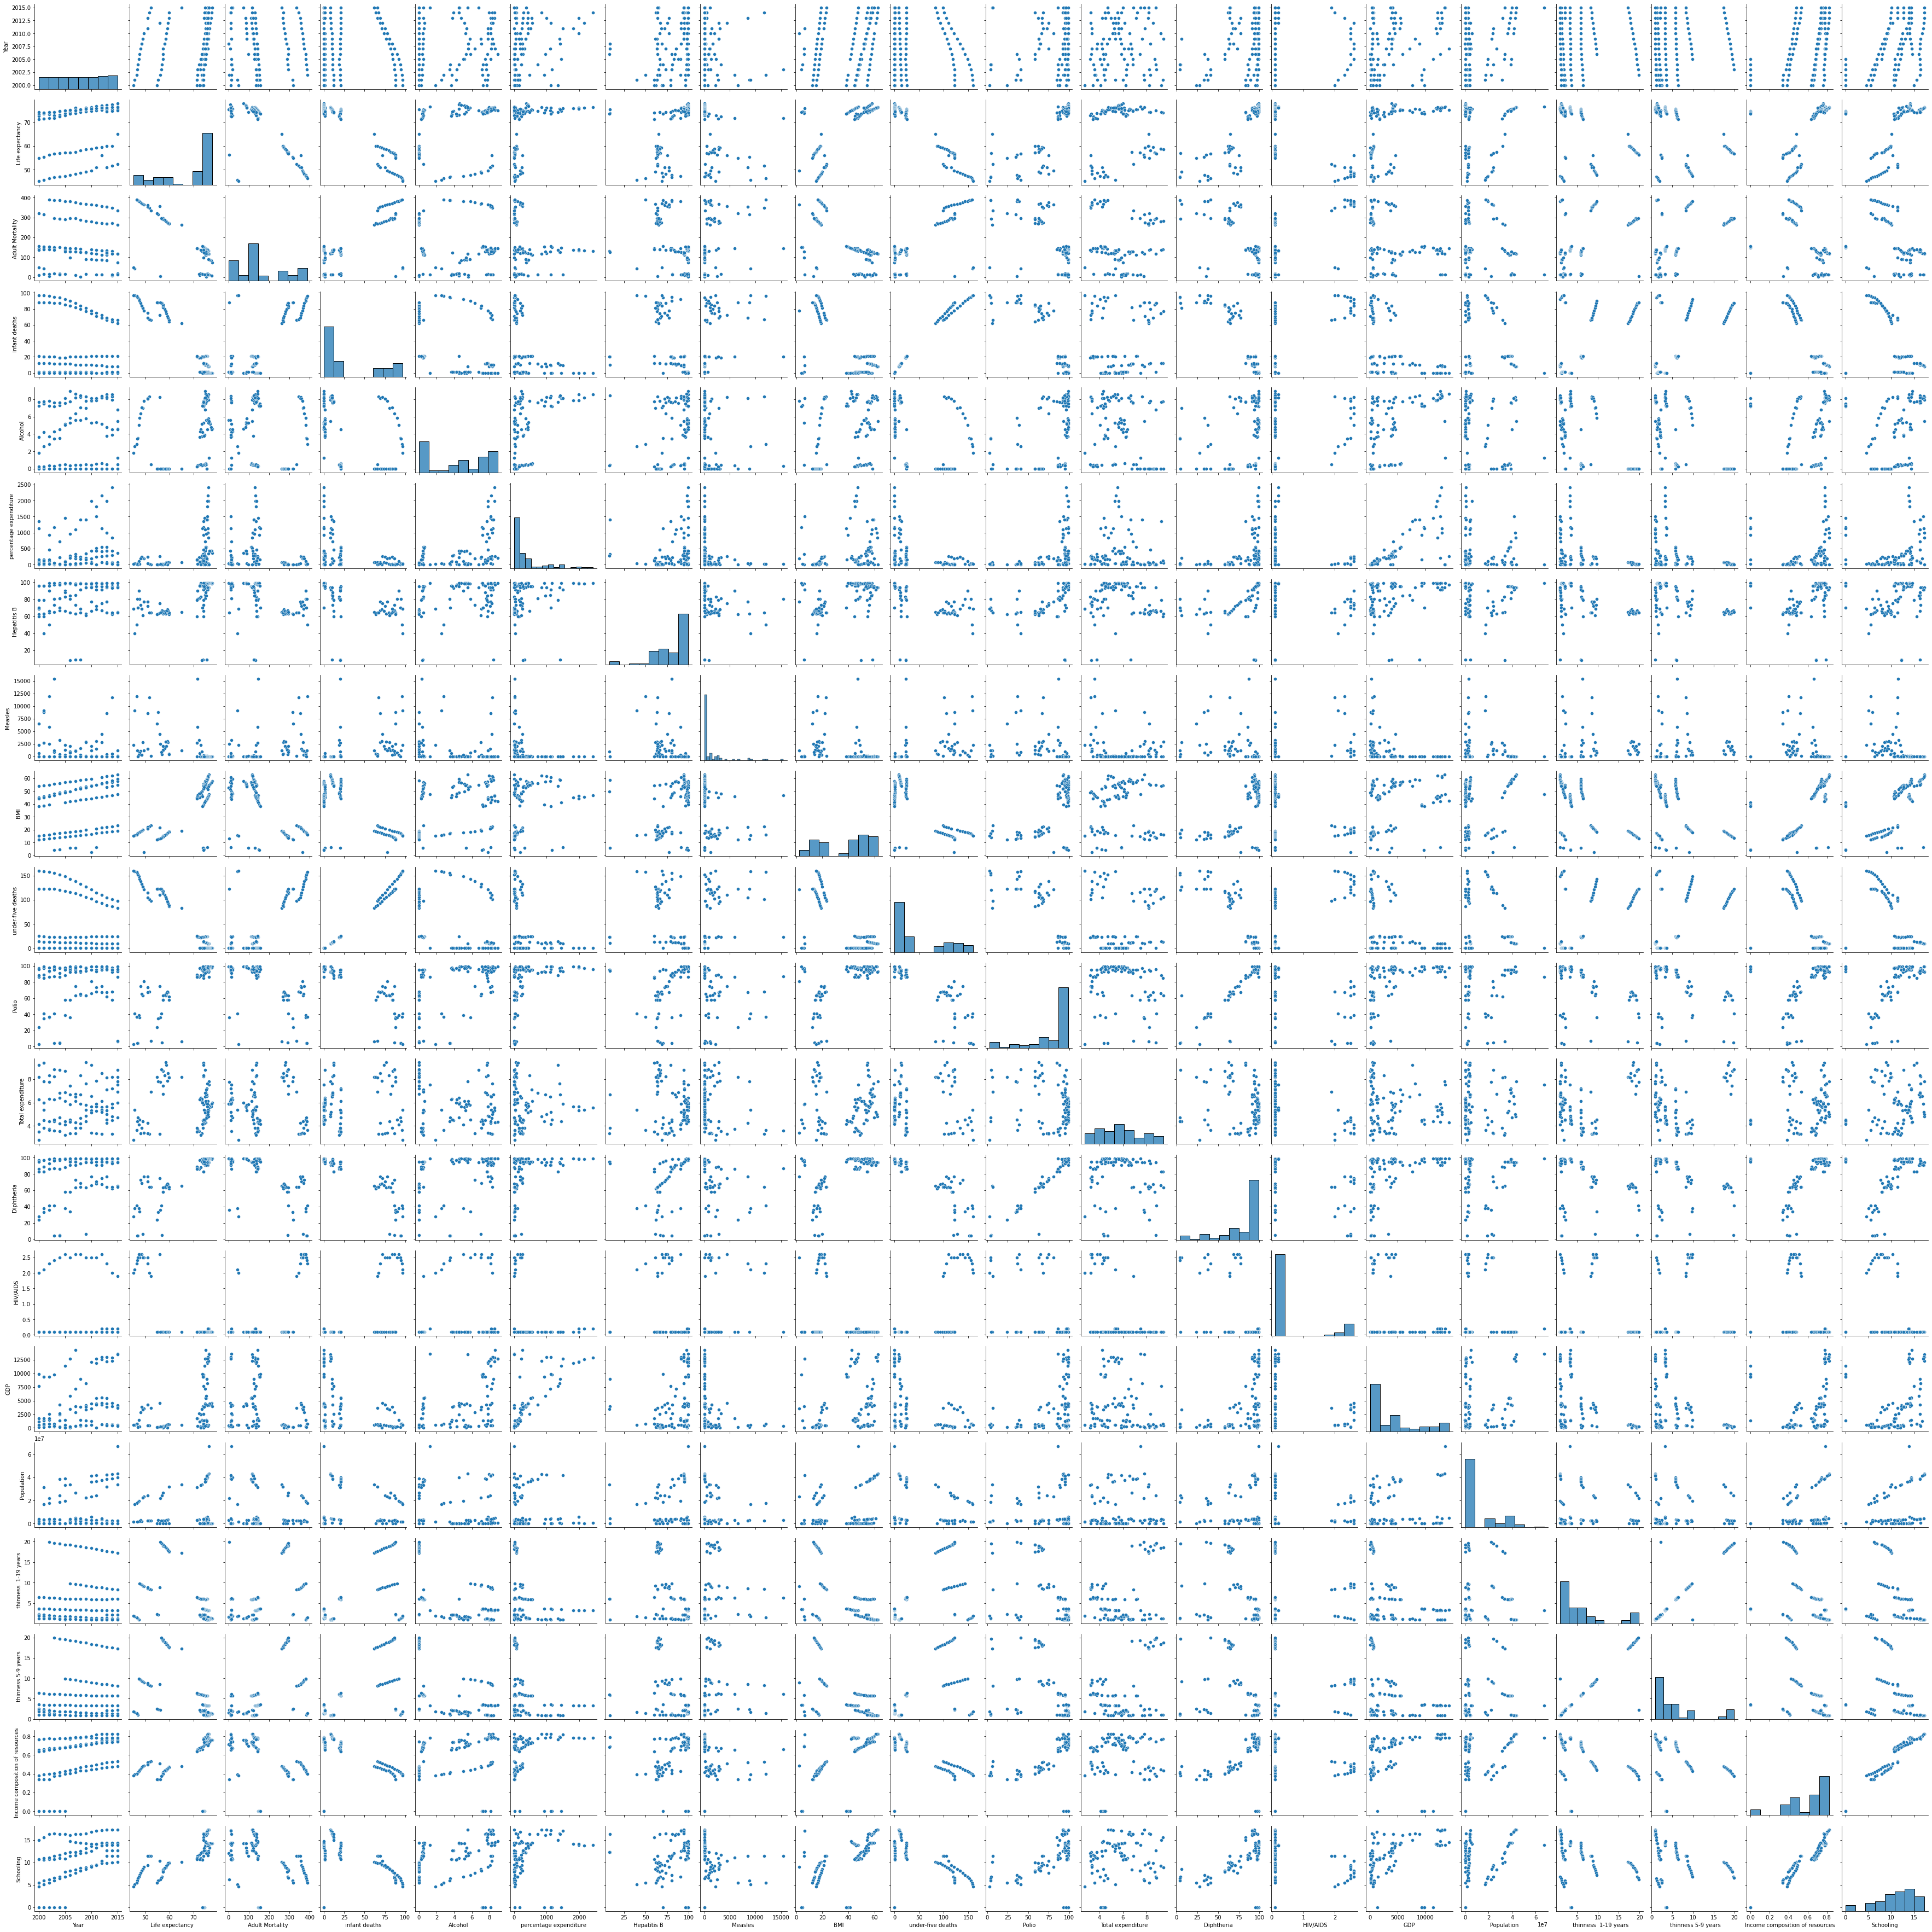

In [50]:
sns.pairplot(raw_data)

In [51]:
raw_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [54]:
x = raw_data[['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [56]:
y = raw_data['Life expectancy ']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train, y_train)

LinearRegression()

In [62]:
print(model.coef_)

[ 5.68324805e-02  1.20125538e-03 -1.92631118e-01 -5.75572990e-02
  7.31560007e-04  6.50489359e-03 -4.89323208e-05  3.64016773e-02
  1.17755290e-02 -2.95168963e-01 -4.87537435e-03 -3.89290056e+00
 -6.71490408e-05  3.04850070e-08 -1.26187621e-02 -3.58986465e-02
 -7.31468295e+00  4.70084463e-01]


In [63]:
print(model.intercept_)

-39.952842729197116


In [64]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Year,5.683248e-02
Adult Mortality,1.201255e-03
infant deaths,-1.926311e-01
Alcohol,-5.755730e-02
percentage expenditure,7.315600e-04
Hepatitis B,6.504894e-03
Measles,-4.893232e-05
BMI,3.640168e-02
Polio,1.177553e-02
Total expenditure,-2.951690e-01


In [65]:
predictions = model.predict(x_test)

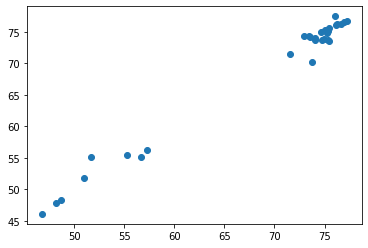

In [66]:
plt.scatter(y_test, predictions)

(array([ 1.,  0.,  2.,  2.,  7., 11.,  3.,  3.,  0.,  1.]),
 array([-3.40247983, -2.70361649, -2.00475314, -1.3058898 , -0.60702646,
         0.09183688,  0.79070023,  1.48956357,  2.18842691,  2.88729025,
         3.5861536 ]),
 <BarContainer object of 10 artists>)

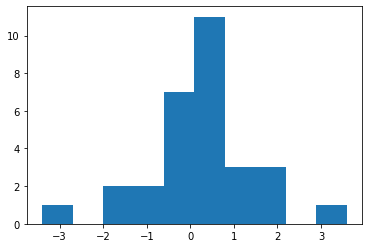

In [67]:
plt.hist(y_test - predictions)

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_absolute_error(y_test, predictions)

0.8522106042670875

In [71]:
metrics.mean_squared_error(y_test, predictions)

1.4819087850951647

In [72]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.2173367591160487

In [73]:
metrics.r2_score(y_test, predictions)

0.9863119918090051